<a href="https://colab.research.google.com/github/yashs79/financialaranomaly/blob/main/03_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **3. Model Selection and Implementation**


#### Importing libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

# pre-processing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# over-sampling
from imblearn.over_sampling import SMOTE

# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, IsolationForest

# Neural Networks
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import layers, losses, regularizers

# performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import auc, roc_curve, average_precision_score, PrecisionRecallDisplay
from sklearn.neighbors import KNeighborsClassifier
from imblearn.metrics import classification_report_imbalanced
np.random.seed(23)

#### Loading data

In [ ]:
raw_data = pd.read_csv('/content/creditcard.csv')

# Stratified Random Sampling
X_train_strat = pd.read_csv('/content/X_train_strat.csv')
X_test_strat = pd.read_csv('/content/X_test_strat.csv')
y_train_strat = pd.read_csv('/content/y_train_strat.csv')
y_test_strat = pd.read_csv('/content/y_test_strat.csv')

# Over Sampling
X_train_os = pd.read_csv('/content/X_train_os.csv')
X_test_os = pd.read_csv('/content/X_test_os.csv')
y_train_os = pd.read_csv('/content/y_train_os.csv')
y_test_os = pd.read_csv('/content/y_test_os.csv')

# Over Sampling with SMOTE
X_train_smote = pd.read_csv('/content/X_train_smote.csv')
X_test_smote = pd.read_csv('/content/X_test_smote.csv')
y_train_smote = pd.read_csv('/content/y_train_smote.csv')
y_test_smote = pd.read_csv('/content/y_test_smote.csv')

### 3.1 Logistic Regression

###### 3.1.1 Stratified Random Sampling

In [ ]:
logreg1 = LogisticRegression() # instantiate the Logistic Regression classifier

clf1 = logreg1.fit(X_train_strat, y_train_strat['Class']) # fit the classifier to the imbalanced data
pred1 = clf1.predict(X_test_strat) # predict on the training data

y_score1 = clf1.predict_proba(X_test_strat)[:, 1]

# Confusion Matrix
print(f'Confusion Matrix\n{confusion_matrix(y_test_strat, pred1)}')# Accuracy
print(classification_report(y_test_strat, pred1))

Confusion Matrix
[[85284    11]
 [   54    94]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.64      0.74       148

    accuracy                           1.00     85443
   macro avg       0.95      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



#### 3.2.2 Over Sampling

In [ ]:
logreg2 = LogisticRegression() # instantiate the Logistic Regression classifier

clf2 = logreg2.fit(X_train_os, y_train_os['Class']) # fit the classifier to the imbalanced data
pred2 = clf2.predict(X_test_os) # predict on the training data

y_score2 = clf2.predict_proba(X_test_os)[:, 1]

# Confusion Matrix
print(f'Confusion Matrix\n{confusion_matrix(y_test_os, pred2)}')# Accuracy
print(classification_report(y_test_os, pred2))

Confusion Matrix
[[273247  10822]
 [    14    232]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    284069
           1       0.02      0.94      0.04       246

    accuracy                           0.96    284315
   macro avg       0.51      0.95      0.51    284315
weighted avg       1.00      0.96      0.98    284315



#### 3.2.3 Over Sampling(`SMOTE`)

In [ ]:
logreg3 = LogisticRegression() # instantiate the Logistic Regression classifier

clf3 = logreg3.fit(X_train_smote, y_train_smote['Class']) # fit the classifier to the imbalanced data
pred3 = clf3.predict(X_test_smote) # predict on the training data

y_score3 = clf3.predict_proba(X_test_smote)[:, 1]

# Confusion Matrix
print(confusion_matrix(y_test_smote, pred3))# Accuracy
print(classification_report(y_test_smote, pred3))

[[83177  2118]
 [   19   129]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.87      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.97      0.99     85443



### Logistic Regression Summary:

Logistic Regression classifier trained on
- stratified random sampling: clf-1
- over sampling (default): clf-2
- over sampling (SMOTE): clf-3

1. clf-1 seems to have best performance(AUPRC) among all 3 variants.
2. clf-2 performs the worst. This is probably due to very less training data(only #246 samples for each class).
3. clf-3 has higher recall than clf1 but has very less precision.

### 4.2 K-Nearest Neighbors

#### 4.2.1 Stratified Random Sampling

In [ ]:
# %%time

# knn = KNeighborsClassifier()

# param_grid = {'n_neighbors': np.arange(1, 16)}

# knn_gscv = GridSearchCV(estimator=knn,
#                         param_grid=param_grid,
#                         scoring='average_precision',
#                         cv=3,
#                         n_jobs=-1,
#                         verbose=3)

# knn_gscv.fit(X_train_strat, y_train_strat['Class'])

In [ ]:
# knn_gscv.best_params_

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=6) # instantiate the K-Nearest Neighbors classifier
print(knn1)

clf1 = knn1.fit(X_train_strat, y_train_strat['Class']) # fit the classifier to the imbalanced data
pred1 = clf1.predict(X_test_strat) # predict on the training data

y_score1 = clf1.predict_proba(X_test_strat)[:, 1]

# Confusion Matrix
print(f'Confusion Matrix\n{confusion_matrix(y_test_strat, pred1)}')# Accuracy
print(classification_report(y_test_strat, pred1))

KNeighborsClassifier(n_neighbors=6)
Confusion Matrix
[[85280    15]
 [   34   114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.77      0.82       148

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



#### 4.2.2 Over Sampling

In [ ]:
# %%time

# knn = KNeighborsClassifier()

# param_grid = {'n_neighbors': np.arange(1,16)}

# knn_gscv = GridSearchCV(estimator=knn,
#                         param_grid=param_grid,
#                         scoring='average_precision',
#                         cv=3,
#                         n_jobs=-1,
#                         verbose=2)

# knn_gscv.fit(X_train_os, y_train_os['Class'])

# knn_gscv.best_params_

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=14) # instantiate the K-Nearest Neighbors classifier
clf2 = knn2.fit(X_train_os, y_train_os['Class']) # fit the classifier to the imbalanced data
pred2 = clf2.predict(X_test_os) # predict on the training data

y_score2 = clf2.predict_proba(X_test_os)[:, 1]

# Confusion Matrix
print(f'Confusion Matrix\n{confusion_matrix(y_test_os, pred2)}')# Accuracy
print(classification_report(y_test_os, pred2))

Confusion Matrix
[[281770   2299]
 [    30    216]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284069
           1       0.09      0.88      0.16       246

    accuracy                           0.99    284315
   macro avg       0.54      0.93      0.58    284315
weighted avg       1.00      0.99      1.00    284315



#### 4.2.3 Over Sampling (SMOTE)

In [ ]:
# %%time

# knn = KNeighborsClassifier()

# param_grid = {'n_neighbors': np.arange(1,16)}

# knn_gscv = GridSearchCV(estimator=knn,
#                         param_grid=param_grid,
#                         scoring='average_precision',
#                         cv=3,
#                         n_jobs=-1,
#                         verbose=2)

# knn_gscv.fit(X_train_smote, y_train_smote['Class'])

# knn_gscv.best_params_

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors=15) # instantiate the K-Nearest Neighbors classifier

clf3 = knn3.fit(X_train_smote, y_train_smote['Class']) # fit the classifier to the imbalanced data
pred3 = clf3.predict(X_test_smote) # predict on the training data

y_score3 = clf3.predict_proba(X_test_smote)[:, 1]

# Confusion Matrix
print(confusion_matrix(y_test_smote, pred3))# Accuracy
print(classification_report(y_test_smote, pred3))

[[84966   329]
 [   26   122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.27      0.82      0.41       148

    accuracy                           1.00     85443
   macro avg       0.64      0.91      0.70     85443
weighted avg       1.00      1.00      1.00     85443



### KNN Classifier Summary:

KNN Classifier trained on
- stratified random sampling: clf1
- over sampling (default): clf2
- over sampling (SMOTE): clf3

1. clf-1(k=6) seems to work best among all 3 variants with an f1-score of 0.82
2. clf-2(k=14) performs the worst. This is probably due to very less training data.
3. clf-3(k=) has higher recall than clf1 but has very less precision.

### 4.3 Random Forest

###### 4.3.1 Stratified Random Sampling

In [ ]:
clf1 = RandomForestClassifier(max_depth = 10, random_state = 23, n_jobs=-1)
print(clf1)

clf1.fit(X_train_strat,y_train_strat['Class'])
pred1 = clf1.predict(X_test_strat)

y_score1 = clf1.predict_proba(X_test_strat)[:, 1]

# Confusion Matrix
print(confusion_matrix(y_test_strat, pred1))# Accuracy
print(classification_report(y_test_strat, pred1))

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=23)
[[85282    13]
 [   32   116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.78      0.84       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



#### 4.3.2 Over Sampling

In [ ]:
clf2 = RandomForestClassifier(max_depth = 10, random_state = 23, n_jobs=-1)
clf2.fit(X_train_os,y_train_os['Class'])
pred2 = clf2.predict(X_test_os)

y_score2 = clf2.predict_proba(X_test_os)[:, 1]

# Confusion Matrix
print(confusion_matrix(y_test_os, pred2))# Accuracy
print(classification_report(y_test_os, pred2))

[[277485   6584]
 [    13    233]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284069
           1       0.03      0.95      0.07       246

    accuracy                           0.98    284315
   macro avg       0.52      0.96      0.53    284315
weighted avg       1.00      0.98      0.99    284315



#### 4.3.3 Over Sampling(`SMOTE`)

In [ ]:
clf3 = RandomForestClassifier(max_depth = 15, random_state = 23, n_jobs=-1)
clf3.fit(X_train_smote,y_train_smote['Class'])
pred3 = clf3.predict(X_test_smote)

y_score3 = clf3.predict_proba(X_test_smote)[:, 1]

# Confusion Matrix
print(confusion_matrix(y_test_smote, pred3))# Accuracy
print(classification_report(y_test_smote, pred3))

[[85244    51]
 [   29   119]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.70      0.80      0.75       148

    accuracy                           1.00     85443
   macro avg       0.85      0.90      0.87     85443
weighted avg       1.00      1.00      1.00     85443



### Random Forest Summary:

- Random Forest Classifier trained on
    - stratified random sampling: clf-1
    - over sampling (default): clf-2
    - over sampling (SMOTE): clf-3

1. clf-1 seems to work best among all 3 variants. It has highest precision(0.90), f1-score(0.84) and auprc of 0.81.
2. clf-2 has the best recall(0.93) but also worst precision(0.03) and f1-score(0.07). This is probably due to very less training data.
3. clf-3 has higher recall(0.82) than clf1(0.78) but has lower precision(0.54).

### 4.4 Decision Tree

###### 4.4.1 Stratified Random Sampling

In [ ]:
clf1 = DecisionTreeClassifier(random_state=23, max_depth=10)
print(clf1)
clf1.fit(X_train_strat,y_train_strat)
pred1 = clf1.predict(X_test_strat)

y_score1 = clf1.predict_proba(X_test_strat)[:, 1]

# Confusion Matrix
print(confusion_matrix(y_test_strat, pred1))# Accuracy
print(classification_report(y_test_strat, pred1))

DecisionTreeClassifier(max_depth=10, random_state=23)
[[85273    22]
 [   38   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.74      0.79       148

    accuracy                           1.00     85443
   macro avg       0.92      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443



###### 4.4.2 Over Sampling

In [ ]:
clf2 = DecisionTreeClassifier(random_state=23, max_depth=10)
clf2.fit(X_train_os,y_train_os)
pred2 = clf2.predict(X_test_os)

y_score2 = clf2.predict_proba(X_test_os)[:, 1]

# Confusion Matrix
print(confusion_matrix(y_test_os, pred2))# Accuracy
print(classification_report(y_test_os, pred2))

[[256575  27494]
 [    13    233]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    284069
           1       0.01      0.95      0.02       246

    accuracy                           0.90    284315
   macro avg       0.50      0.93      0.48    284315
weighted avg       1.00      0.90      0.95    284315



###### 4.4.3 Over Sampling (SMOTE)

In [ ]:
clf3=DecisionTreeClassifier(random_state=23, max_depth=10)
clf3.fit(X_train_smote,y_train_smote)
pred3 = clf3.predict(X_test_smote)

y_score3 = clf3.predict_proba(X_test_smote)[:, 1]

# Confusion Matrix
print(confusion_matrix(y_test_smote, pred3))# Accuracy
print(classification_report(y_test_smote, pred3))

[[84667   628]
 [   30   118]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.16      0.80      0.26       148

    accuracy                           0.99     85443
   macro avg       0.58      0.89      0.63     85443
weighted avg       1.00      0.99      0.99     85443



### Decision Tree Classifier Summary:

- Decision Tree Classifier trained on
    - stratified random sampling: clf-1
    - over sampling (default): clf-2
    - over sampling (SMOTE): clf-3

1. clf-1 seems to work best among all 3 variants. It has highest precision(0.83), f1-score(0.79) and auprc(0.62).
2. clf-2 has the best recall(0.94) but also worst precision(0.01) and f1-score(0.02). This is probably due to very less training data.
3. clf-3 has higher recall(0.80) than clf1(0.74) but has lower precision(0.16).

## Comparing all models on the 3 variants of the dataset

#### 1. AUPRC for stratified random sampling

In [ ]:
lr01 = LogisticRegression()
knn01 = KNeighborsClassifier(n_neighbors = 6)
rf01 = RandomForestClassifier(max_depth = 10, random_state = 23, n_jobs=-1)
dt01 = DecisionTreeClassifier(random_state = 23, max_depth = 10)

lr01.fit(X_train_strat, y_train_strat['Class'])
knn01.fit(X_train_strat, y_train_strat['Class'])
rf01.fit(X_train_strat, y_train_strat['Class'])
dt01.fit(X_train_strat, y_train_strat['Class'])

y_hat_lr01 = lr01.predict(X_test_strat)
y_hat_knn01 = knn01.predict(X_test_strat)
y_hat_rf01 = rf01.predict(X_test_strat)
y_hat_dt01 = dt01.predict(X_test_strat)

r_lr01, p_lr01, f1_lr01, ap_lr01 = recall_score(y_test_strat, y_hat_lr01 ), precision_score(y_test_strat, y_hat_lr01), f1_score(y_test_strat, y_hat_lr01), average_precision_score(y_test_strat, y_hat_lr01)
r_knn01, p_knn01, f1_knn01, ap_knn01 = recall_score(y_test_strat, y_hat_knn01), precision_score(y_test_strat, y_hat_knn01), f1_score(y_test_strat, y_hat_knn01), average_precision_score(y_test_strat, y_hat_knn01)
r_rf01, p_rf01, f1_rf01, ap_rf01  = recall_score(y_test_strat, y_hat_rf01), precision_score(y_test_strat, y_hat_rf01), f1_score(y_test_strat, y_hat_rf01), average_precision_score(y_test_strat, y_hat_rf01)
r_dt01, p_dt01, f1_dt01, ap_dt01  = recall_score(y_test_strat, y_hat_dt01), precision_score(y_test_strat, y_hat_dt01), f1_score(y_test_strat, y_hat_dt01), average_precision_score(y_test_strat, y_hat_dt01)

data = {'Recall': [r_lr01, r_knn01, r_rf01, r_dt01],
        'Precision': [p_lr01, p_knn01, p_rf01, p_dt01],
        'f1-score': [f1_lr01, f1_knn01, f1_rf01, f1_dt01],
        'Average Precision': [ap_lr01, ap_knn01, ap_rf01, ap_dt01]}

results_df1 = pd.DataFrame(data = data, index = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree'])
results_df1

,Recall,Precision,f1-score,Average Precision
Logistic Regression,0.635135,0.895238,0.743083,0.569229
KNN,0.770270,0.883721,0.823105,0.681102
Random Forest,0.783784,0.899225,0.837545,0.705172
Decision Tree,0.743243,0.833333,0.785714,0.619814


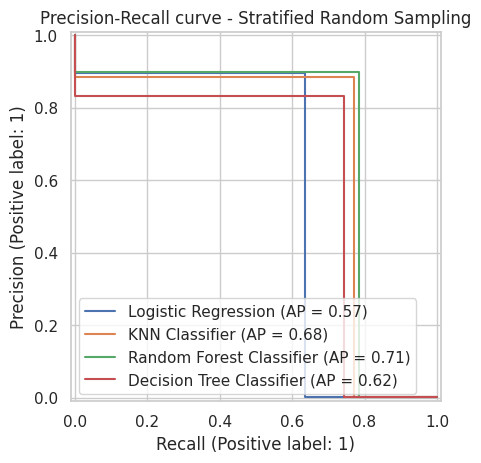

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test_strat, y_hat_lr01, ax = plt.gca(), name='Logistic Regression')
display = PrecisionRecallDisplay.from_predictions(y_test_strat, y_hat_knn01,  ax = plt.gca(),name='KNN Classifier')
display = PrecisionRecallDisplay.from_predictions(y_test_strat, y_hat_rf01,  ax = plt.gca(),name='Random Forest Classifier')
display = PrecisionRecallDisplay.from_predictions(y_test_strat, y_hat_dt01,  ax = plt.gca(),name='Decision Tree Classifier')

_ = display.ax_.set_title('Precision-Recall curve - Stratified Random Sampling')

#### 2. AUPRC for over sampling (default)

In [ ]:
lr02 = LogisticRegression()
knn02 = KNeighborsClassifier(n_neighbors = 14)
rf02 = RandomForestClassifier(max_depth = 10, random_state = 23, n_jobs=-1)
dt02 = DecisionTreeClassifier(random_state = 23, max_depth=10)

lr02.fit(X_train_os, y_train_os['Class'])
knn02.fit(X_train_os, y_train_os['Class'])
rf02.fit(X_train_os, y_train_os['Class'])
dt02.fit(X_train_os, y_train_os['Class'])

y_hat_lr02 = lr02.predict(X_test_os)
y_hat_knn02 = knn02.predict(X_test_os)
y_hat_rf02 = rf02.predict(X_test_os)
y_hat_dt02 = dt02.predict(X_test_os)

r_lr02, p_lr02, f1_lr02 = recall_score(y_test_os, y_hat_lr02 ), precision_score(y_test_os, y_hat_lr02), f1_score(y_test_os, y_hat_lr02)
r_knn02, p_knn02, f1_knn02 = recall_score(y_test_os, y_hat_knn02), precision_score(y_test_os, y_hat_knn02), f1_score(y_test_os, y_hat_knn02)
r_rf02, p_rf02, f1_rf02  = recall_score(y_test_os, y_hat_rf02), precision_score(y_test_os, y_hat_rf02), f1_score(y_test_os, y_hat_rf02)
r_dt02, p_dt02, f1_dt02  = recall_score(y_test_os, y_hat_dt02), precision_score(y_test_os, y_hat_dt02), f1_score(y_test_os, y_hat_dt02)

data = {'Recall': [r_lr02, r_knn02, r_rf02, r_dt02],
        'Precision': [p_lr02, p_knn02, p_rf02, p_dt02],
        'f1-score': [f1_lr02, f1_knn02, f1_rf02, f1_dt02]}

results_df2 = pd.DataFrame(data = data, index = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree'])
results_df2

,Recall,Precision,f1-score
Logistic Regression,0.943089,0.020988,0.041062
KNN,0.878049,0.085885,0.156465
Random Forest,0.947154,0.034179,0.065978
Decision Tree,0.947154,0.008403,0.016659


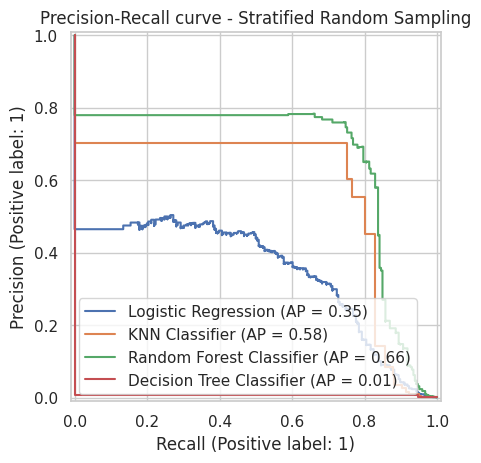

In [ ]:
display = PrecisionRecallDisplay.from_estimator(lr02, X_test_os, y_test_os, ax = plt.gca(), name='Logistic Regression')
display = PrecisionRecallDisplay.from_estimator(knn02, X_test_os,  y_test_os,ax = plt.gca(),name='KNN Classifier')
display = PrecisionRecallDisplay.from_estimator(rf02, X_test_os,  y_test_os,ax = plt.gca(),name='Random Forest Classifier')
display = PrecisionRecallDisplay.from_estimator(dt02, X_test_os,  y_test_os,ax = plt.gca(),name='Decision Tree Classifier')

_ = display.ax_.set_title('Precision-Recall curve - Stratified Random Sampling')

#### 3. ROC curve for oversampling(SMOTE)

In [ ]:
lr03 = LogisticRegression()
knn03 = KNeighborsClassifier(n_neighbors=15)
rf03 = RandomForestClassifier(max_depth = 15, random_state = 23, n_jobs=-1)
dt03 = DecisionTreeClassifier(random_state=23, max_depth=10)

lr03.fit(X_train_smote, y_train_smote['Class'])
knn03.fit(X_train_smote, y_train_smote['Class'])
rf03.fit(X_train_smote, y_train_smote['Class'])
dt03.fit(X_train_smote, y_train_smote['Class'])

y_hat_lr03 = lr03.predict(X_test_smote)
y_hat_knn03 = knn03.predict(X_test_smote)
y_hat_rf03 = rf03.predict(X_test_smote)
y_hat_dt03 = dt03.predict(X_test_smote)

r_lr03, p_lr03, f1_lr03 = recall_score(y_test_smote, y_hat_lr03), precision_score(y_test_smote, y_hat_lr03), f1_score(y_test_smote, y_hat_lr03)
r_knn03, p_knn03, f1_knn03 = recall_score(y_test_smote, y_hat_knn03), precision_score(y_test_smote, y_hat_knn03), f1_score(y_test_smote, y_hat_knn03) # Changed f1_knn033 to f1_knn03
r_rf03, p_rf03, f1_rf03  = recall_score(y_test_smote, y_hat_rf03), precision_score(y_test_smote, y_hat_rf03), f1_score(y_test_smote, y_hat_rf03)
r_dt03, p_dt03, f1_dt03  = recall_score(y_test_smote, y_hat_dt03), precision_score(y_test_smote, y_hat_dt03), f1_score(y_test_smote, y_hat_dt03)

data = {'Recall': [r_lr03, r_knn03, r_rf03, r_dt03],
        'Precision': [p_lr03, p_knn03, p_rf03, p_dt03],
        'f1-score': [f1_lr03, f1_knn03, f1_rf03, f1_dt03]} # Now uses the correctly defined f1_knn03

results_df3 = pd.DataFrame(data = data, index = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree'])
results_df3

,Recall,Precision,f1-score
Logistic Regression,0.871622,0.057410,0.107724
KNN,0.824324,0.270510,0.407346
Random Forest,0.804054,0.700000,0.748428
Decision Tree,0.797297,0.158177,0.263982


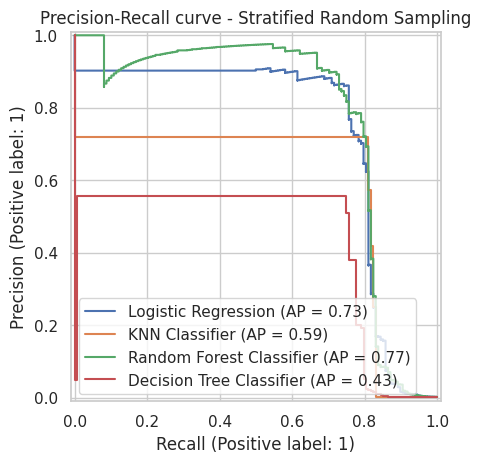

In [ ]:
display = PrecisionRecallDisplay.from_estimator(lr03, X_test_smote, y_test_smote, ax = plt.gca(), name='Logistic Regression')
display = PrecisionRecallDisplay.from_estimator(knn03, X_test_smote,  y_test_smote,ax = plt.gca(),name='KNN Classifier')
display = PrecisionRecallDisplay.from_estimator(rf03, X_test_smote,  y_test_smote,ax = plt.gca(),name='Random Forest Classifier')
display = PrecisionRecallDisplay.from_estimator(dt03, X_test_smote,  y_test_smote,ax = plt.gca(),name='Decision Tree Classifier')

_ = display.ax_.set_title('Precision-Recall curve - Stratified Random Sampling')

### Summary

##### Business Goal-1: Minimizing False Negatives(Focus is to capture max # Fradulent Transactions) -> High Recall
- In this case, we are ok with flagging normal transactions as fradulent transactions, but it's more costly to miss a fraudulent transaction.
- We send all fraudulent transactions to next round of human inspection where false positives are filtered out.
- But, if we miss capturing a fradulent transaction, there is no way to mitigate it.

##### Business Goal-2: Minimizing False Positives(Focus is to correctly predict Fraudulent Transactions) -> High Precision
- In this case, we are ok with not capturing some fradulent transactions, but it's more costly to falsely label a normal transaction as a fraudulent transaction.
- Here, cost of human inspection is more than the cost of missing to capture a fraudulent transaction.
     
##### Business Goal-3: We care a lot about finding the positive examples -> High AUPRC or Average Precision
- We want our model to correctly label max # of fradulent transactions (high recall) without accidentally marking any normal transactions as fradulent(high precision). The `average precision` is one particular method for calculating the AUPRC.

1. For Business Goal-1, `Random Forest Classifier` seems to be better suited with the highest recall of 0.78 on the Fradulent Class.
2. For Business Goal-2 also, `Random Forest Classifier` seems to be better suited with the highest recall of 0.90 on the Fradulent Class.
3. For Business Goal-3 also, `Random Forest Classifier` seems to be better suited with the highest recall of 0.71 on the Fradulent Class.